In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from helper_functions import load_dataset, save_dataset

### Loading the dataset

In [2]:
data = load_dataset("../data/assignment1_income_levels.xlsx")

## 1) Data Inspection and Preparation

First, we do some basic inspection of the dataset, such as checking the first few rows, the data types, the amount of missing values, and the value counts of certain columns.

In [3]:
data.head()

,age,workclass,education,marital status,occupation,workinghours,sex,ability to speak english,gave birth this year,income
0,52,self employed,16,Widowed,Transport,50,Male,NaN,NaN,high
1,60,private,20,Divorced,Healthcare/Medical Services,30,Female,NaN,NaN,low
2,64,private,21,Divorced,Management/Business,40,Male,NaN,NaN,low
3,64,private,17,Husband,Transport,40,Male,NaN,NaN,low
4,31,private,15,Husband,Transport,40,Male,NaN,NaN,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       9000 non-null   int64  
 1   workclass                 9000 non-null   object 
 2   education                 9000 non-null   int64  
 3   marital status            9000 non-null   object 
 4   occupation                9000 non-null   object 
 5   workinghours              9000 non-null   int64  
 6   sex                       9000 non-null   object 
 7   ability to speak english  403 non-null    float64
 8   gave birth this year      1942 non-null   object 
 9   income                    9000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 703.3+ KB


In [5]:
data.describe()

,age,education,workinghours,ability to speak english
count,9000.000000,9000.000000,9000.000000,403.000000
mean,43.557556,18.298778,39.227889,1.660050
std,15.280589,3.212958,12.462668,0.867355
min,17.000000,1.000000,1.000000,1.000000
25%,30.000000,16.000000,37.000000,1.000000
50%,44.000000,19.000000,40.000000,1.000000
75%,56.000000,21.000000,44.000000,2.000000
max,93.000000,24.000000,99.000000,4.000000


In [6]:
data.isnull().sum() # check amount of missing values per column

age                            0
workclass                      0
education                      0
marital status                 0
occupation                     0
workinghours                   0
sex                            0
ability to speak english    8597
gave birth this year        7058
income                         0
dtype: int64

In [7]:
# percentage of missing values in 'ability to speak english' column
data['ability to speak english'].isnull().sum() / len(data) * 100

95.52222222222223

In [8]:
# percentage of missing values in 'gave birth this year' column
data['gave birth this year'].isnull().sum() / len(data) * 100

78.42222222222223

In [9]:
# percentage of "Yes" and "No" values in the 'gave birth this year' column
data['gave birth this year'].value_counts() / len(data) * 100

gave birth this year
No     20.155556
Yes     1.422222
Name: count, dtype: float64

In [10]:
# percentage of "Male" and "Female" values in the 'sex' column
data['sex'].value_counts() / len(data) * 100

sex
Male      66.666667
Female    33.333333
Name: count, dtype: float64

In [11]:
# percentages of value counts for the 'workclass' column
data['workclass'].value_counts() / len(data) * 100

workclass
private          73.822222
governmental     15.722222
self employed    10.188889
no paid work      0.266667
Name: count, dtype: float64

In [12]:
# value counts for the 'marital status' column
data['marital status'].value_counts()

marital status
Husband          3588
Never married    2388
Wife             1571
Divorced         1105
Widowed           188
Separated         160
Name: count, dtype: int64

In [13]:
# check for people younger than 25, 30, 40, how many of them are 'Never married'.
never_married = [data[(data['age'] < 25) & (data['marital status'] == 'Never married')].shape[0],
                 data[(data['age'] < 30) & (data['marital status'] == 'Never married')].shape[0],
                 data[(data['age'] < 40) & (data['marital status'] == 'Never married')].shape[0]]
# get total count of people who are never married
total_never_married = data[data['marital status'] == 'Never married'].shape[0]
# get the percentage of people who are never married
never_married_percentages = [x / total_never_married * 100 for x in never_married]
df = pd.DataFrame({'Age Group': ['<25', '<30', '<40'], 'Count of Never Married': never_married, 'Percentage of Never Married': never_married_percentages})

In [14]:
df

,Age Group,Count of Never Married,Percentage of Never Married
0,<25,1055,44.179229
1,<30,1517,63.525963
2,<40,1960,82.077052


We can see that there are way more men than women (66.7% vs 33.3%) in the dataset. People are mostly working in the 'private' sector (73.8%), with the second being 'governmental' (15.7%). The husband to wife ratio is a bit more than 2:1, which is reasonable considering the 'sex' column distribution. If we look at people younger than 40, we are already at 82% of the total amount of people who are 'Never married'. It seems to be decently correlated to age, which makes sense of course.

### Imputing missing values & changing data types

We have 2 columns with missing values: 'ability to speak english' and 'gave birth this year'. We will impute the missing values in the 'ability to speak english' column with 0 (for native speakers), and the missing values in the 'gave birth this year' column with a 'No'. We will also change the data type of certain columns if they can be represented with smaller data types to save memory.

In [15]:
# Impute missing values in 'ability to speak English' column with 0 (for native speakers)
data['ability to speak english'] = data['ability to speak english'].fillna(0)

In [16]:
# Impute missing values in 'gave birth this year' column with a 'No'
data['gave birth this year'] = data['gave birth this year'].fillna('No')

In [17]:
# change the data type of certain columns if they can be represented with smaller data types to save memory
data['age'] = data['age'].astype('int8') # in our dataset: min age is 17 and max age is 93
data['education'] = data['education'].astype('int8') # in our dataset: min education is 1 and max education is 24
data['workinghours'] = data['workinghours'].astype('int8') # in our dataset: min working hours is 1 and max working hours is 99
data['ability to speak english'] = data['ability to speak english'].astype('int8') # in our dataset: min number of 'ability to speak english' is 0 and max ability to speak english is 4

### Binning columns: 'age', 'workinghours', 'education'

#### 'age' column: extra analysis and binning

In [18]:
# check how much a person has workinghours on average per age, for people older than 65
data['workinghours'][data['age'] > 65].groupby(data['age']).agg(['mean', 'count'])

,mean,count
age,,
66,34.346939,98
67,33.154762,84
68,33.831169,77
69,30.015625,64
70,33.440678,59
71,31.034483,58
72,25.739130,23
73,28.035714,28
74,33.424242,33


Although pension age is around 65, the mean of most ages > 65 is still quite high (we of course keep the per-age count in mind).

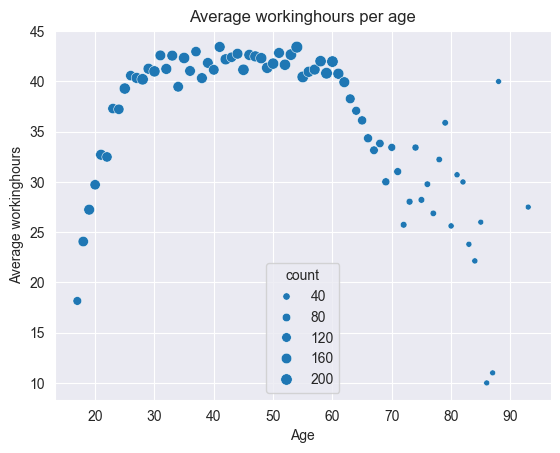

In [19]:
p = sns.scatterplot(data=data['workinghours'][data['age'] > 16].groupby(data['age']).agg(['mean', 'count']).reset_index(), x='age', y='mean', size='count')
p.set(xlabel='Age', ylabel='Average workinghours', title='Average workinghours per age')
plt.show()

Above is a plot of the previously generated dataframe, with x-axis as age, y-axis as average workinghours, and the size of the point as the amount of people of that age. We can see a reverse U-shape (parabola), which is quite interesting. We can observe that people on average work less when they are younger, then work more when they are in their 30s to their 60s, and then work less again when they are older.

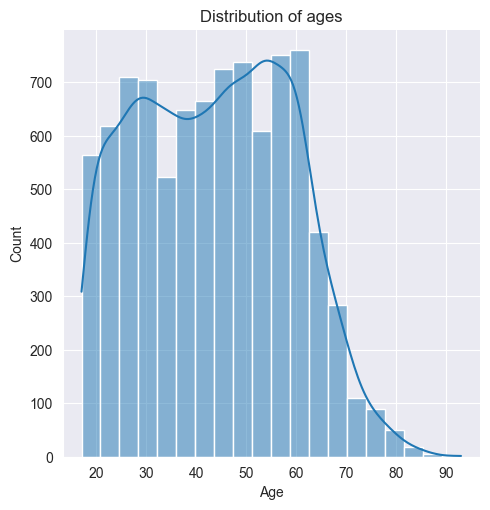

In [20]:
# plot of the distribution of the 'age' column for first easy inspection
p = sns.displot(data['age'], kde=True, bins=20)
p.set(xlabel='Age', ylabel='Count', title='Distribution of ages')
plt.show()

We can see that the distribution of the ages has a bit of a negative skew (increasingly lower counts for 65+), with two small peaks in roughly the ranges 25-35 and 45-65.

In [21]:
pd.qcut(data['age'], q=5, retbins=True) # quantile-based binning

(0         (49.0, 58.0]
 1         (58.0, 93.0]
 2         (58.0, 93.0]
 3         (58.0, 93.0]
 4         (28.0, 38.0]
              ...      
 8995    (16.999, 28.0]
 8996      (58.0, 93.0]
 8997      (28.0, 38.0]
 8998      (58.0, 93.0]
 8999      (49.0, 58.0]
 Name: age, Length: 9000, dtype: category
 Categories (5, interval[float64, right]): [(16.999, 28.0] < (28.0, 38.0] < (38.0, 49.0] < (49.0, 58.0] < (58.0, 93.0]],
 array([17., 28., 38., 49., 58., 93.]))

In [22]:
# we will do customized binning for the 'age' column; '17-28', '28-38', '38-49', '49-65', '65-93', but this is based on the quantile-based binning output.
# Furthermore, other reasons for this binning include the results of the average workinghours scatterplot (where we see that people in the range 17-28 and in the range 65-93 are significantly different from the other age ranges, meaning the large 65-93 group is a viable option) and the fact that the first four age ranges have a difference of roughly 10 years, which is a not a bad amount of time for a generation.
data['age_bin'] = pd.cut(data['age'], bins=[0,28,38,49,65,93], labels=['(17-28]', '(28-38]', '(38-49]', '(49-65]', '(65-93]'])

In [23]:
data['age_bin'].value_counts().sort_index() # check the frequency of each bin

age_bin
(17-28]    1893
(28-38]    1710
(38-49]    1936
(49-65]    2804
(65-93]     657
Name: count, dtype: int64

#### 'workinghours' column: extra analysis and binning

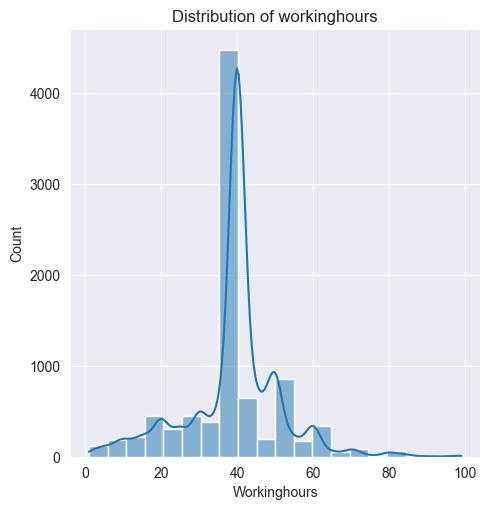

In [24]:
# plot of the distribution of the 'workinghours' column
p = sns.displot(data['workinghours'], kde=True, bins=20)
p.set(xlabel='Workinghours', ylabel='Count', title='Distribution of workinghours')
plt.show()

In [25]:
# we check for bins of size 5, the frequency of each bin
pd.cut(data['workinghours'], bins=range(0, 105, 5)).value_counts().sort_index()

workinghours
(0, 5]        113
(5, 10]       184
(10, 15]      218
(15, 20]      452
(20, 25]      300
(25, 30]      446
(30, 35]      382
(35, 40]     4467
(40, 45]      650
(45, 50]      988
(50, 55]      199
(55, 60]      360
(60, 65]       51
(65, 70]       73
(70, 75]       28
(75, 80]       46
(80, 85]       24
(85, 90]        6
(90, 95]        1
(95, 100]      12
Name: count, dtype: int64

In [26]:
data['workinghours'][(data['workinghours'] >= 40) & (data['workinghours'] <= 45)].value_counts()

workinghours
40    4190
45     461
42     102
44      38
43      38
41      11
Name: count, dtype: int64

In [27]:
# we will do customized binning for the 'workinghours' column; 'Part-time' (0-30 hours), 'Full-time' (31-40 hours), and 'Overtime' (41-99 hours)
# https://www.bls.gov/cps/definitions.htm#fullparttime
# https://www.glassdoor.com/blog/guide/how-many-hours-is-part-time/
data['workinghours_bin'] = pd.cut(data['workinghours'], bins=[0, 30, 40, 99], labels=['Part-time', 'Full-time', 'Overtime'])

In [28]:
data['workinghours_bin'].value_counts().sort_index() # check the frequency of each bin

workinghours_bin
Part-time    1713
Full-time    4849
Overtime     2438
Name: count, dtype: int64

#### 'education' column: extra analysis and binning

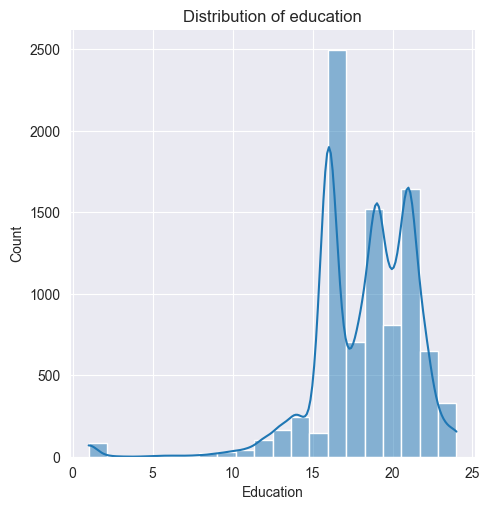

In [29]:
# plot of the distribution of the 'education' column
p = sns.displot(data['education'], kde=True, bins=20)
p.set(xlabel='Education', ylabel='Count', title='Distribution of education')
plt.show()

In [30]:
# percentage of people that have an education of atleast 16
data['education'][data['education'] >= 16].value_counts().sum() / len(data) * 100

90.55555555555556

We see on the graph, and in the percentage, that most people (~90%) have a somewhat higher education level.

In [31]:
data['education'].value_counts().sort_index() # check the frequency of each education level

education
1       78
2        5
3        1
5        4
6        6
7        5
8        8
9       17
10      30
11      42
12     101
13     165
14     242
15     146
16    2060
17     434
18     707
19    1523
20     807
21    1641
22     648
23     185
24     145
Name: count, dtype: int64

In [32]:
# we will do customized binning for the 'education' column; https://ilostat.ilo.org/resources/concepts-and-definitions/classification-education/
data['education_bin'] = pd.cut(data['education'], bins=[0, 3, 12, 20, 24], labels=['Less than basic', 'Basic', 'Intermediate', 'Advanced'])

In [33]:
data['education_bin'].value_counts().sort_index() # check the frequency of each bin

education_bin
Less than basic      84
Basic               213
Intermediate       6084
Advanced           2619
Name: count, dtype: int64

### Extra inspection of the dataset

In [34]:
# we check how many did not give birth this year in percentage
data['gave birth this year'].value_counts() / len(data) * 100

gave birth this year
No     98.577778
Yes     1.422222
Name: count, dtype: float64

In [35]:
counts = data.groupby(['sex', 'income']).size().unstack(fill_value=0)
total_counts = data['sex'].value_counts()
# Calculate the percentage of each income level for each sex
percentage = counts.div(total_counts, axis=0) * 100

In [36]:
percentage

income,high,low
sex,,
Female,20.433333,79.566667
Male,41.100000,58.900000


Above, we can see the income distribution ('high' or 'low') in percentages for male and female.

In [37]:
# we check the amount of men that work in the 'private' sector
male_private_count = data[(data['sex'] == 'Male') & (data['workclass'] == 'private')].shape[0]

In [38]:
male_private_count

4404

In [39]:
male_private_count / len(data) * 100

48.93333333333334

In [42]:
# check amount of rows with wife, low and female
data[(data['marital status'] == 'Wife') & (data['income'] == 'low') & (data['sex'] == 'Female')].shape[0] / len(data)

0.132

In [43]:
data[(data['income'] == 'low') & (data['sex'] == 'Female')].shape[0] / len(data)

0.26522222222222225

### Final step

In [ ]:
data = data.drop(columns=['age', 'workinghours', 'education']) # we drop the original columns

In [ ]:
data

### Writing the cleaned dataset to a new file

In [ ]:
# write cleaned dataset to new file
save_dataset(data, "../data/assignment1_income_levels_cleaned.xlsx")